# Examples of Tree Calculations Made Using unsampled

In [1]:
from unsampled import *
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib as mpl

### Import Trees

In [2]:
#imports trees as DendroPy trees

#toy tree with some simultaneous sampling
toy_2 = Tree.get(path="toytree2.nex", schema="nexus")
name_nodes(toy_2)
name_edges(toy_2)

#Conakry subtree 
conakry = Tree.get(path="ebola.tree", schema="nexus")
name_nodes(conakry)
name_edges(conakry)

#Full Ebola MCC tree generated from constant population, empty alignment
ebov = Tree.get(path="full-ebola.nex", schema="nexus")
name_nodes(ebov)
name_edges(ebov)


### Functions available from unsampled:
    - prod: finds the product of a list of numbers or if the list is empty returns 1
    - name_nodes: names nodes sequentially (1, 2, 3, ...) or if it's a leaf, leaves the existing name
    - name_edges: names edges sequentially 
#### Tree Intervals:
    -zipped_sorted_intervals: for an entire tree, divides the tree into intervals and gives [beginning of interval (dist from root), end of interval], [all active lineages within that interval]
    -zipped_partial_intervals: same as above but can take in a distance from the root to begin the first interval (will only evaluate part of the tree)
    - conditioned_prob_lineage_coal: conditional probability of coalescing to one lineage in a specific interval, dependent on the tree structure
    - pcoal_along_edge: dictionary where each edge is a key with the value corresponding to the conditioned probability of coalescing to that edge

#### Full tree measures:   
    - calcualte_cumulative_node_prob: expected proportion of tips expected under each clade
    - node_zscores: z-scores for each internal node (difference between expected proportion and observed in the tree)
    
#### For Validation:
    - randomly prune tree: prunes specified proportion of tree and keeps relevant information
    - theoretical_attachment_prob_matrix: for each dropped sample's location, gives the probability of attaching to each edge in the available, pruned tree
    - observed_attachment_prob_matrix: given a tree, pruned tree, and dropped samples, find where the dropped samples attached to the pruned tree
    - binary_expectations: for the theoretical attachment probability matrix record only the edge with the highest probability (classification)
    
#### For Plotting:
    - y_dist_dict: assigns each node a y-position to use for plotting
    

## Toy Example

In [3]:
#total distance from root to furthest tip
toy_2.max_distance_from_root()

62.0

In [4]:
y_positions = y_dist_dict(toy_2)

In [5]:
#initialize some plotting settings
cmap = mpl.cm.get_cmap('inferno') #color map
branchWidth=2
lty = "-"
s = 30

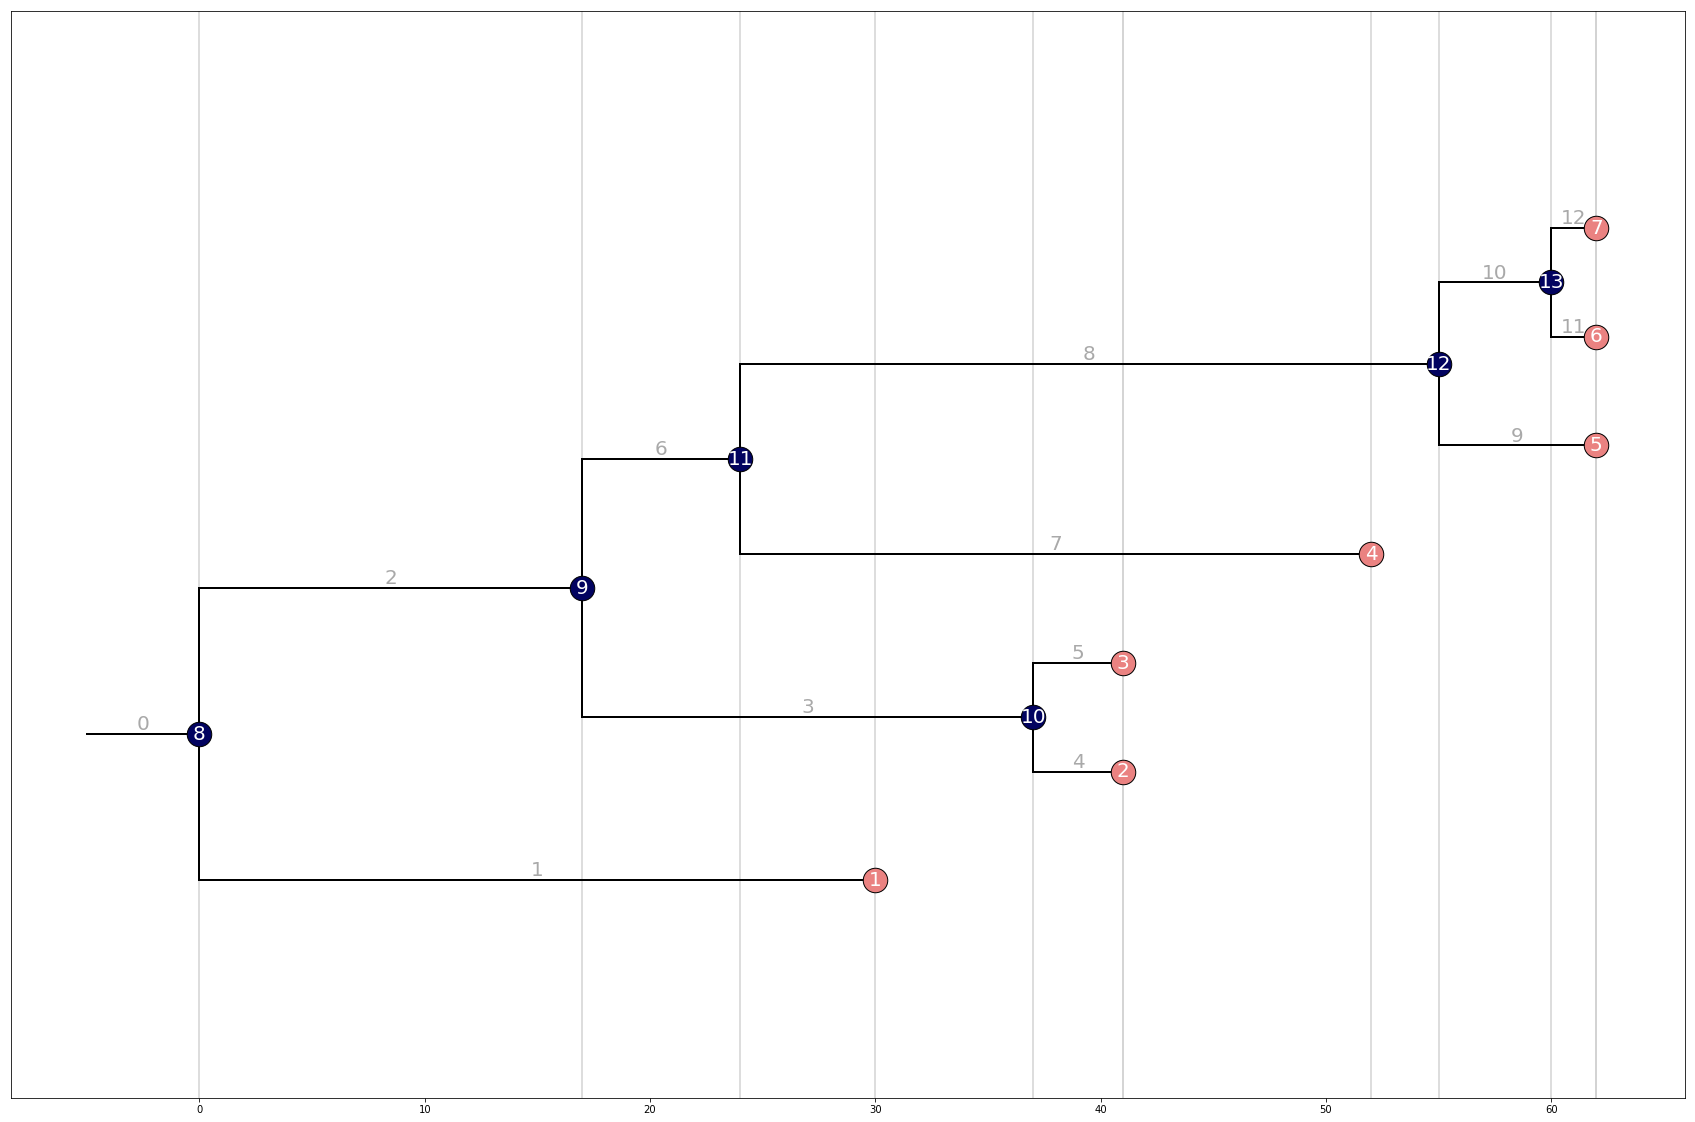

In [6]:
#plotted toy tree with labeled nodes and edges

fig,ax = plt.subplots(figsize=(30,20),facecolor='w')
for k in toy_2.nodes(): ## iterate over objects in tree
    
    # positioning
    y=y_positions.get(k) 
    yp = y_positions.get(k.parent_node)
    if k.edge.rootedge:
        x=0.0
    else:
        x=k.distance_from_root()
    if k.parent_node==None:
        xp=x-5
    else:
        xp=k.parent_node.distance_from_root()
        

    if k.is_leaf(): # if leaf...
        ax.scatter(x,y,s=600,facecolor='#ea8281', edgecolor='k',zorder=11) # plot circle for every tip
    else:
        ax.scatter(x,y,s=600,facecolor='#020360',edgecolor='k', zorder=11) # plot circle for every internal node
    ax.plot([xp,xp],[y, yp],lw=2, color='k',ls='-',zorder=9) #vertical bar plotting
    ax.plot([xp,x], [y,y], lw=2, color='k', ls='-', zorder=9) #branch plotting
    plt.axvline(x, c = "lightgrey")
    #labeling
    ax.text(x, y, k.label, va = 'center', ha= 'center', size=20, color = 'w', zorder = 16)
    ax.text(x -.5*(x-xp), y, k.edge.label, va = 'bottom', ha= 'center', size=20, color = 'darkgrey', zorder = 18)
       
ax.set_ylim(-2, len(toy_2.leaf_nodes()) + 1)
ax.yaxis.set_visible(False)

#fig.savefig('toytreeex.png', bbox_inches = 'tight')
plt.show()

In [7]:
#for the full tree the conditional probability of coalescing to one lineage within that interval
interval_pcoal = conditioned_prob_lineage_coal(toy_2, 50)
interval_pcoal

[0.03769318776094751,
 0.08038569982173331,
 0.04228762786133505,
 0.12171487735317825,
 0.030153158172423835,
 0.03656098353851305,
 0.020026840080584703,
 0.014864586637034894,
 0.02107607653267766]

In [8]:
#population size = 50
full_pcoal = pcoal_along_edge(toy_2, 50) #full tree
full_pcoal

{<dendropy.datamodel.treemodel.Edge at 0x829a080>: 0.043282797901965986,
 <dendropy.datamodel.treemodel.Edge at 0x829a128>: 0.05596750325029726,
 <dendropy.datamodel.treemodel.Edge at 0x829a198>: 0.02107607653267766,
 <dendropy.datamodel.treemodel.Edge at 0x829a208>: 0.07145241025613265,
 <dendropy.datamodel.treemodel.Edge at 0x829a278>: 0.030153158172423835,
 <dendropy.datamodel.treemodel.Edge at 0x829a2e8>: 0.030153158172423835,
 <dendropy.datamodel.treemodel.Edge at 0x829a358>: 0.014864586637034894,
 <dendropy.datamodel.treemodel.Edge at 0x829a3c8>: 0.20845585914469983,
 <dendropy.datamodel.treemodel.Edge at 0x829a438>: 0.25074348700603494,
 <dendropy.datamodel.treemodel.Edge at 0x829a4a8>: 0.11807888758268081,
 <dendropy.datamodel.treemodel.Edge at 0x829a518>: 0.08038569982173331,
 <dendropy.datamodel.treemodel.Edge at 0x829a588>: 0.03769318776094751,
 <dendropy.datamodel.treemodel.Edge at 0x829a5f8>: 0.03769318776094751}

In [9]:
pcoal_along_edge(toy_2, 50, 70) #a slice further than the most recent sampled tip, gives the same probs as t

{<dendropy.datamodel.treemodel.Edge at 0x829a080>: 0.043282797901965986,
 <dendropy.datamodel.treemodel.Edge at 0x829a128>: 0.05596750325029726,
 <dendropy.datamodel.treemodel.Edge at 0x829a198>: 0.02107607653267766,
 <dendropy.datamodel.treemodel.Edge at 0x829a208>: 0.07145241025613265,
 <dendropy.datamodel.treemodel.Edge at 0x829a278>: 0.030153158172423835,
 <dendropy.datamodel.treemodel.Edge at 0x829a2e8>: 0.030153158172423835,
 <dendropy.datamodel.treemodel.Edge at 0x829a358>: 0.014864586637034894,
 <dendropy.datamodel.treemodel.Edge at 0x829a3c8>: 0.20845585914469983,
 <dendropy.datamodel.treemodel.Edge at 0x829a438>: 0.25074348700603494,
 <dendropy.datamodel.treemodel.Edge at 0x829a4a8>: 0.11807888758268081,
 <dendropy.datamodel.treemodel.Edge at 0x829a518>: 0.08038569982173331,
 <dendropy.datamodel.treemodel.Edge at 0x829a588>: 0.03769318776094751,
 <dendropy.datamodel.treemodel.Edge at 0x829a5f8>: 0.03769318776094751}

In [25]:
cut_point = 39.0
partial_pcoal = pcoal_along_edge(toy_2, 50, cut_point) #sliced partway through the tree
partial_pcoal

{<dendropy.datamodel.treemodel.Edge at 0x829a080>: 0.11532512103806247,
 <dendropy.datamodel.treemodel.Edge at 0x829a128>: 0.1491229633804595,
 <dendropy.datamodel.treemodel.Edge at 0x829a198>: 0.05615628367287511,
 <dendropy.datamodel.treemodel.Edge at 0x829a208>: 0.19038182050785418,
 <dendropy.datamodel.treemodel.Edge at 0x829a278>: 0.03696405275844716,
 <dendropy.datamodel.treemodel.Edge at 0x829a2e8>: 0.03696405275844716,
 <dendropy.datamodel.treemodel.Edge at 0x829a358>: 0.03960604064874824,
 <dendropy.datamodel.treemodel.Edge at 0x829a3c8>: 0.18773983261755312,
 <dendropy.datamodel.treemodel.Edge at 0x829a438>: 0.18773983261755312,
 <dendropy.datamodel.treemodel.Edge at 0x829a4a8>: 0.0,
 <dendropy.datamodel.treemodel.Edge at 0x829a518>: 0.0,
 <dendropy.datamodel.treemodel.Edge at 0x829a588>: 0.0,
 <dendropy.datamodel.treemodel.Edge at 0x829a5f8>: 0.0}

In [26]:
cut_point

39.0

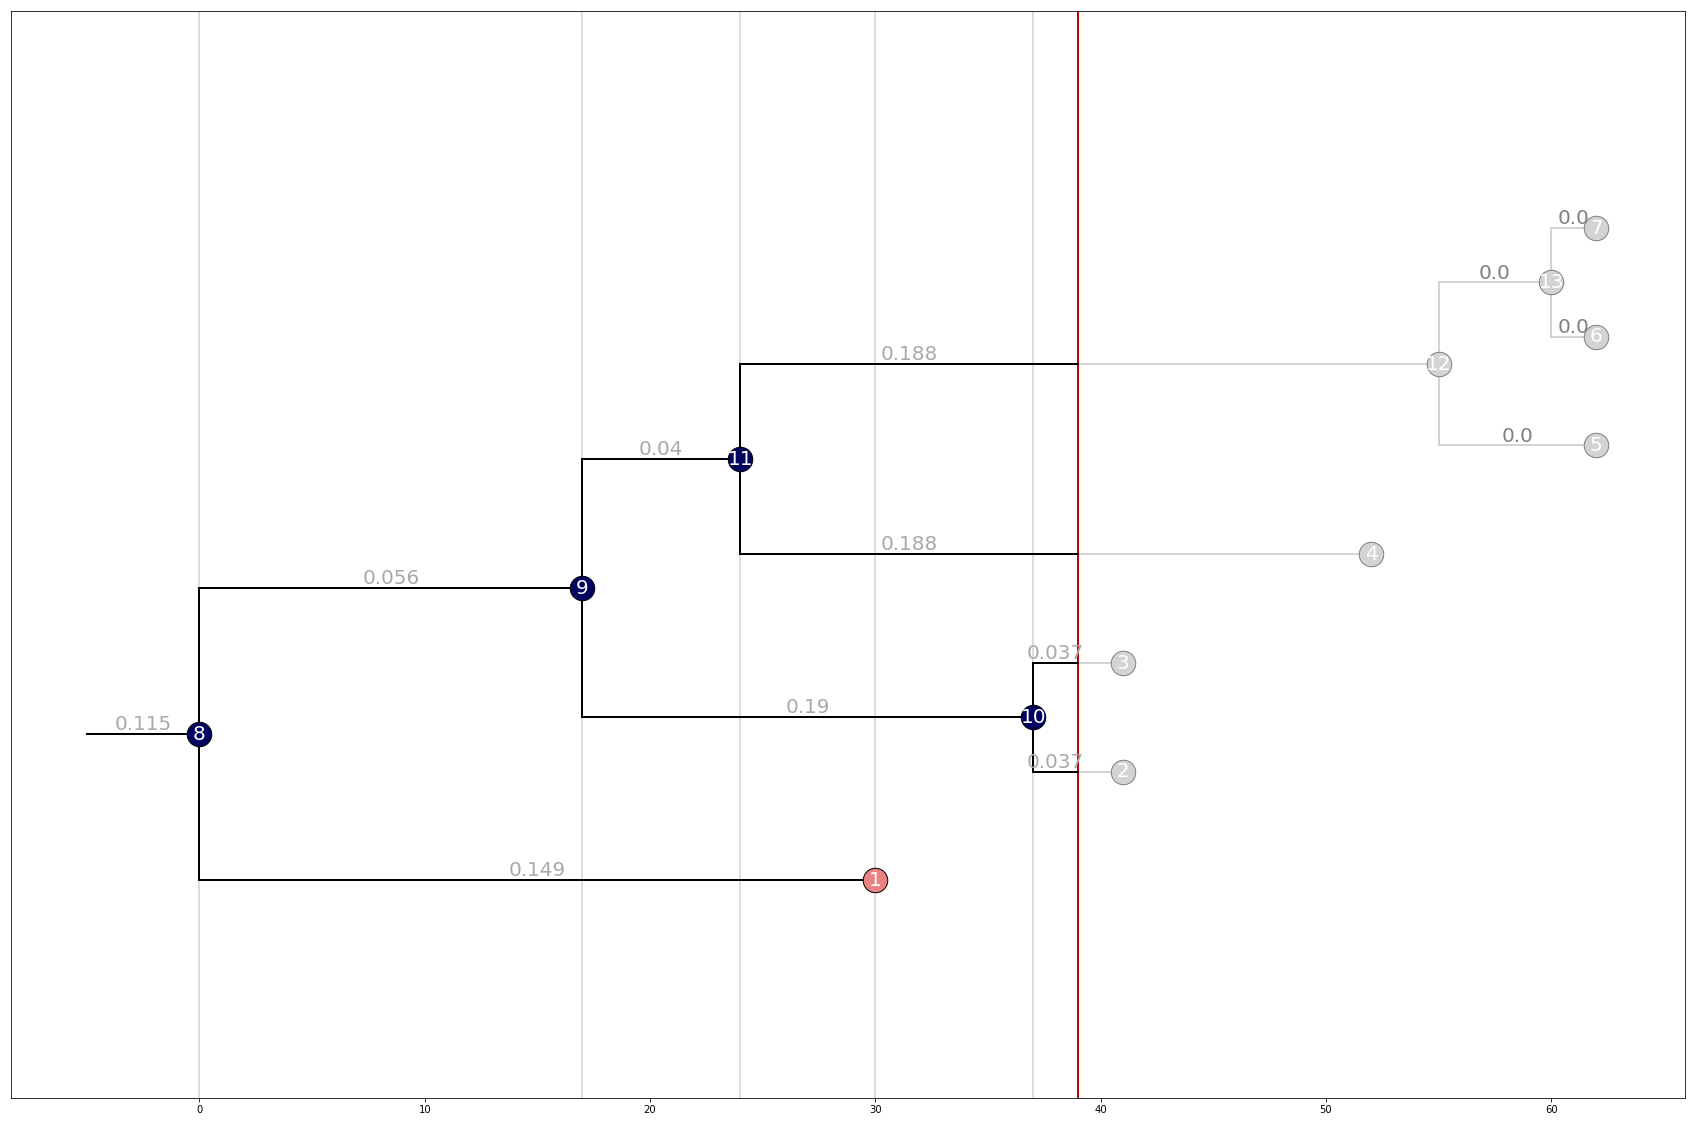

In [33]:
#plotted toy tree with labeled nodes and edges
fig,ax = plt.subplots(figsize=(30,20),facecolor='w')
for k in toy_2.nodes(): ## iterate over objects in tree
    
    # positioning
    y=y_positions.get(k) 
    yp = y_positions.get(k.parent_node)
    if k.edge.rootedge:
        x=0.0
    else:
        x=k.distance_from_root()
    if k.parent_node==None:
        xp=x-5
    else:
        xp=k.parent_node.distance_from_root()
        
    if x > cut_point and xp > cut_point:
        if k.is_leaf(): # if leaf...
            ax.scatter(x,y,s=600,facecolor= 'lightgrey',edgecolor='grey',zorder=11) # plot circle for every tip
        else:
            ax.scatter(x,y,s=600,facecolor='lightgrey',edgecolor='grey',zorder=11) # plot circle for every internal node
        ax.plot([xp,xp],[y, yp],lw=2, color='lightgrey',ls='-',zorder=9) #vertical bar plotting
        ax.plot([xp,x], [y,y], lw=2, color='lightgrey', ls='-', zorder=9) #branch plotting
        #labeling
        ax.text(x, y, k.label, va = 'center', ha= 'center', size=20, color = 'w', zorder = 16)
        ax.text(x -.5*(x-xp), y, round(partial_pcoal.get(k.edge), 3), va = 'bottom', ha= 'center', size=20, color = 'grey', zorder = 18)
    
    elif x < cut_point and xp < cut_point:
        if k.is_leaf(): # if leaf...
            ax.scatter(x,y,s=600,facecolor= '#ea8281',edgecolor='k',zorder=11) # plot circle for every tip
        else:
            ax.scatter(x,y,s=600,facecolor='#020360',edgecolor='k',zorder=11) # plot circle for every internal node
        ax.plot([xp,xp],[y, yp],lw=2, color='k',ls='-',zorder=9) #vertical bar plotting
        ax.plot([xp,x], [y,y], lw=2, color='k', ls='-', zorder=9) #branch plotting
        plt.axvline(x, c = "lightgrey")
        #labeling
        ax.text(x, y, k.label, va = 'center', ha= 'center', size=20, color = 'w', zorder = 16)
        ax.text(x -.5*(x-xp), y, round(partial_pcoal.get(k.edge), 3), va = 'bottom', ha= 'center', size=20, color = 'darkgrey', zorder = 18)
    else:
        ax.scatter(x,y,s=600,facecolor='lightgrey',edgecolor='grey',zorder=11) # plot circle for every internal node
        ax.plot([xp,xp],[y, yp],lw=2, color='k',ls='-',zorder=9) #vertical bar plotting
        ax.plot([cut_point,x], [y,y], lw=2, color='lightgrey', ls='-', zorder=9) #branch plotting
        ax.plot([xp,cut_point], [y,y], lw=2, color='k', ls='-', zorder=9) #branch plotting
        ax.text(x, y, k.label, va = 'center', ha= 'center', size=20, color = 'w', zorder = 16)
        ax.text(cut_point -.5*(cut_point-xp), y, round(partial_pcoal.get(k.edge), 3), va = 'bottom', ha= 'center', size=20, color = 'darkgrey', zorder = 18)
    
    
    plt.axvline(cut_point, c = "#c10100")
    
       
ax.set_ylim(-2, len(toy_2.leaf_nodes()) + 1)
ax.yaxis.set_visible(False)

plt.show()

In [12]:
node_probs = calculate_cumulative_node_prob(toy_2, 50)
node_probs

{<Node object at 0x829a048L: '8' (None)>: 0.956717202098034,
 <Node object at 0x829a160L: '9' (None)>: 0.8796736223150591,
 <Node object at 0x829a1d0L: '10' (None)>: 0.06030631634484767,
 <Node object at 0x829a320L: '11' (None)>: 0.7330503090770439,
 <Node object at 0x829a400L: '12' (None)>: 0.27385096292630917,
 <Node object at 0x829a4e0L: '13' (None)>: 0.07538637552189502}

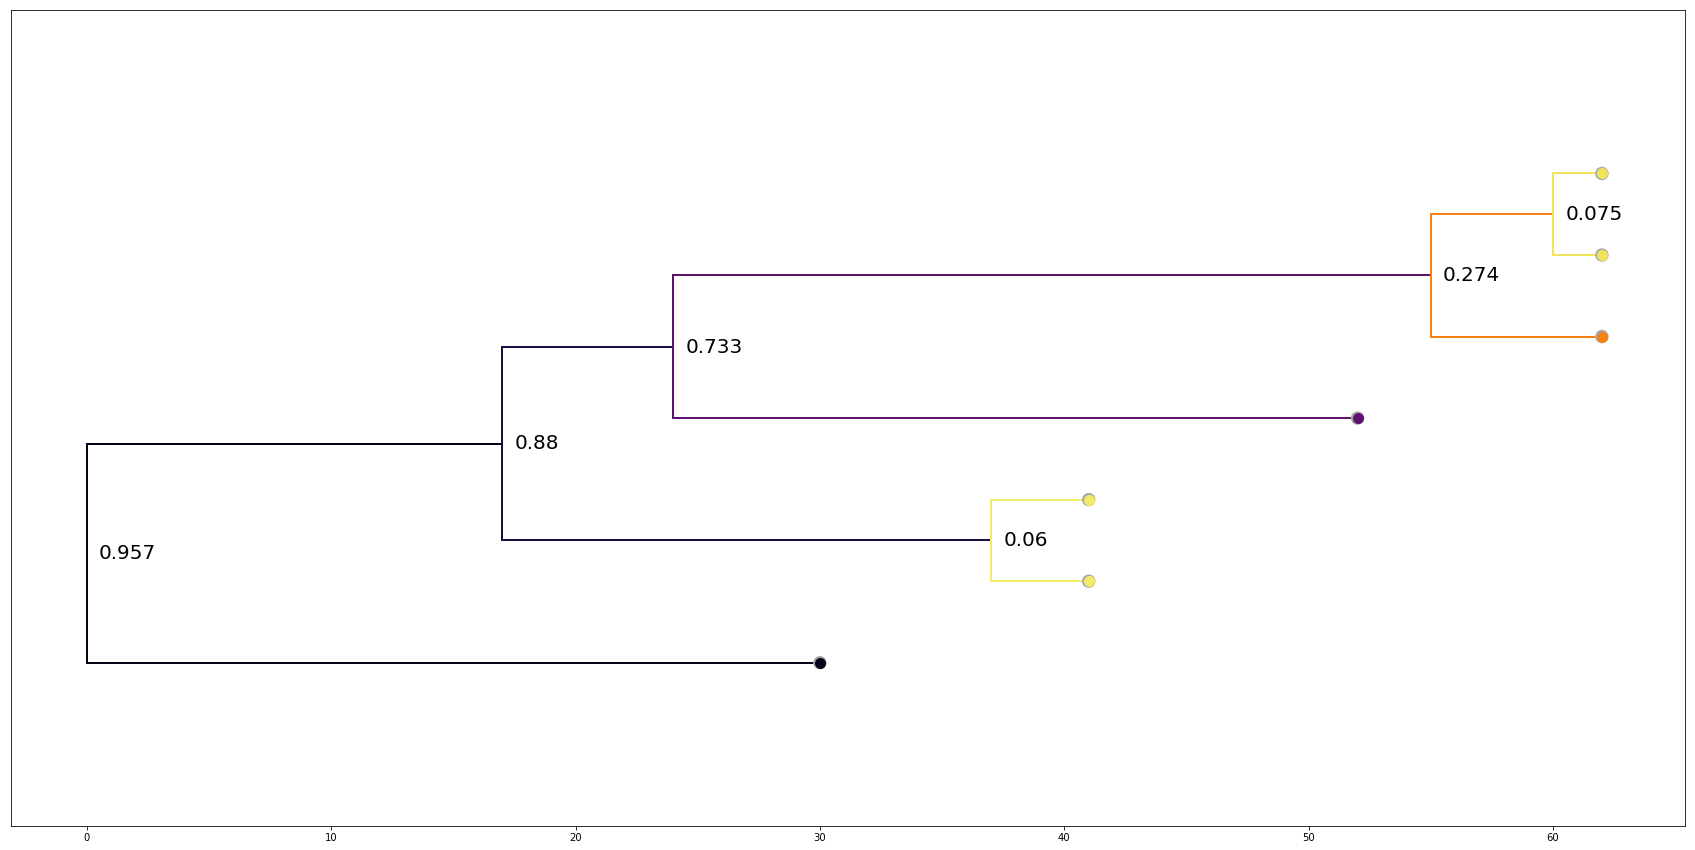

In [13]:
fig,ax = plt.subplots(figsize=(30,15),facecolor='w')

for k in toy_2.nodes(): ## iterate over objects in tree
    
    # positioning
    y=y_positions.get(k) 
    if k.edge.rootedge:
        x=0.0
    else:
        x=k.distance_from_root()
  
    if node_probs.get(k) != None:
        c = cmap(1-(node_probs.get(k)))
        txt = round(node_probs.get(k), 3)
    else:
        c = cmap(1-(node_probs.get(k.parent_node)))
        txt = ""

    if k.is_leaf(): # if leaf...
        ax.scatter(x,y,s=100,facecolor=c,edgecolor=c,zorder=11) # plot circle for every tip
        ax.scatter(x,y,s=100+0.8*100,facecolor='darkgrey',edgecolor='none',zorder=10) # plot black circle underneath
        
    else:
        yc1 = y_positions.get(k.child_nodes()[0])
        yc2 = y_positions.get(k.child_nodes()[-1])
        xc1 = k.child_nodes()[0].distance_from_root()
        xc2 = k.child_nodes()[-1].distance_from_root()
    
        ax.plot([x,x],[yc1, yc2],lw=branchWidth, color=c,ls='-',zorder=9) #vertical bar plotting
        ax.plot([xc1,x], [yc1,yc1], lw=branchWidth, color=c, ls='-', zorder=9) #plot top child edge
        ax.plot([xc2,x], [yc2,yc2], lw=branchWidth, color=c, ls='-', zorder=9) #plot bottom child edge
    
    #labeling
    ax.text(x + .5, y, txt, va = 'center', ha= 'left', size=20, color = 'k')

ax.set_ylim(-2, len(toy_2.leaf_nodes()) + 1)
ax.yaxis.set_visible(False)
plt.show()

In [14]:
zs = node_zscores(node_probs, toy_2)
zs

{<Node object at 0x829a048L: '8' (None)>: 0.20978051018862087,
 <Node object at 0x829a160L: '9' (None)>: 0.6460250792340243,
 <Node object at 0x829a1d0L: '10' (None)>: -0.99743443499845352,
 <Node object at 0x829a320L: '11' (None)>: 1.5679882508319025,
 <Node object at 0x829a400L: '12' (None)>: -0.52888299729010013,
 <Node object at 0x829a4e0L: '13' (None)>: -0.89747640796599315}

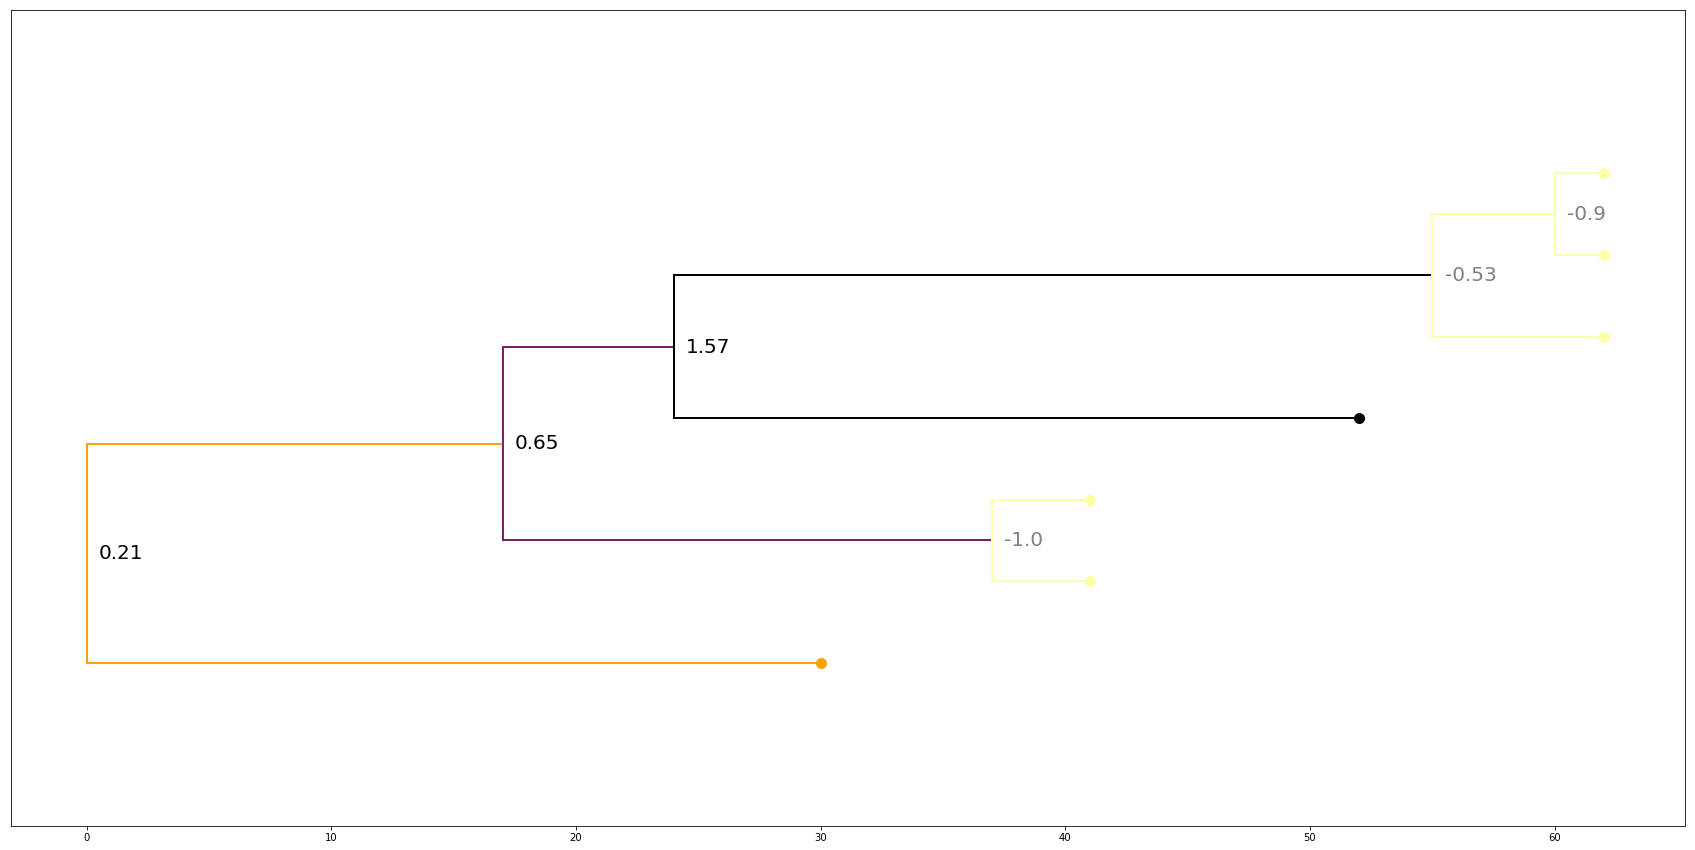

In [15]:
fig,ax = plt.subplots(figsize=(30,15),facecolor='w')

for k in toy_2.nodes(): ## iterate over objects in tree
    
    # positioning
    y=y_positions.get(k) 
    if k.edge.rootedge:
        x=0.0
    else:
        x=k.distance_from_root()

    # dropped tips, color, lty, size
    if node_probs.get(k) != None:
        c = cmap(1-(zs.get(k)))
        txt = round(zs.get(k), 2)
        if zs.get(k) > 0:
            col = "k"
        else:
            col = "grey"
    else:
        c = cmap(1-(zs.get(k.parent_node)))
        txt = ""

    lty = "-"
    s = 100
    
    if k.is_leaf(): # if leaf...
        ax.scatter(x,y,s=s,facecolor=c,edgecolor=c,zorder=11) # plot circle for every tip
        
    else:
        yc1 = y_positions.get(k.child_nodes()[0])
        yc2 = y_positions.get(k.child_nodes()[-1])
        xc1 = k.child_nodes()[0].distance_from_root()
        xc2 = k.child_nodes()[-1].distance_from_root()
    
        ax.plot([x,x],[yc1, yc2],lw=branchWidth, color=c,ls=lty,zorder=9) #vertical bar plotting
        ax.plot([xc1,x], [yc1,yc1], lw=branchWidth, color=c, ls=lty, zorder=9) #plot top child edge
        ax.plot([xc2,x], [yc2,yc2], lw=branchWidth, color=c, ls=lty, zorder=9) #plot bottom child edge
    
    #labeling
    ax.text(x + .5, y, txt, va = 'center', ha= 'left', size=20, color = col)

ax.set_ylim(-2, len(toy_2.leaf_nodes()) + 1)
ax.yaxis.set_visible(False)
plt.show()

## Conakry Subtree

### Cumulative Expected Node Proportions

In [16]:
s=30
#population of 1
con_node_probs = calculate_cumulative_node_prob(conakry, 1)
con_y_positions = y_dist_dict(conakry)

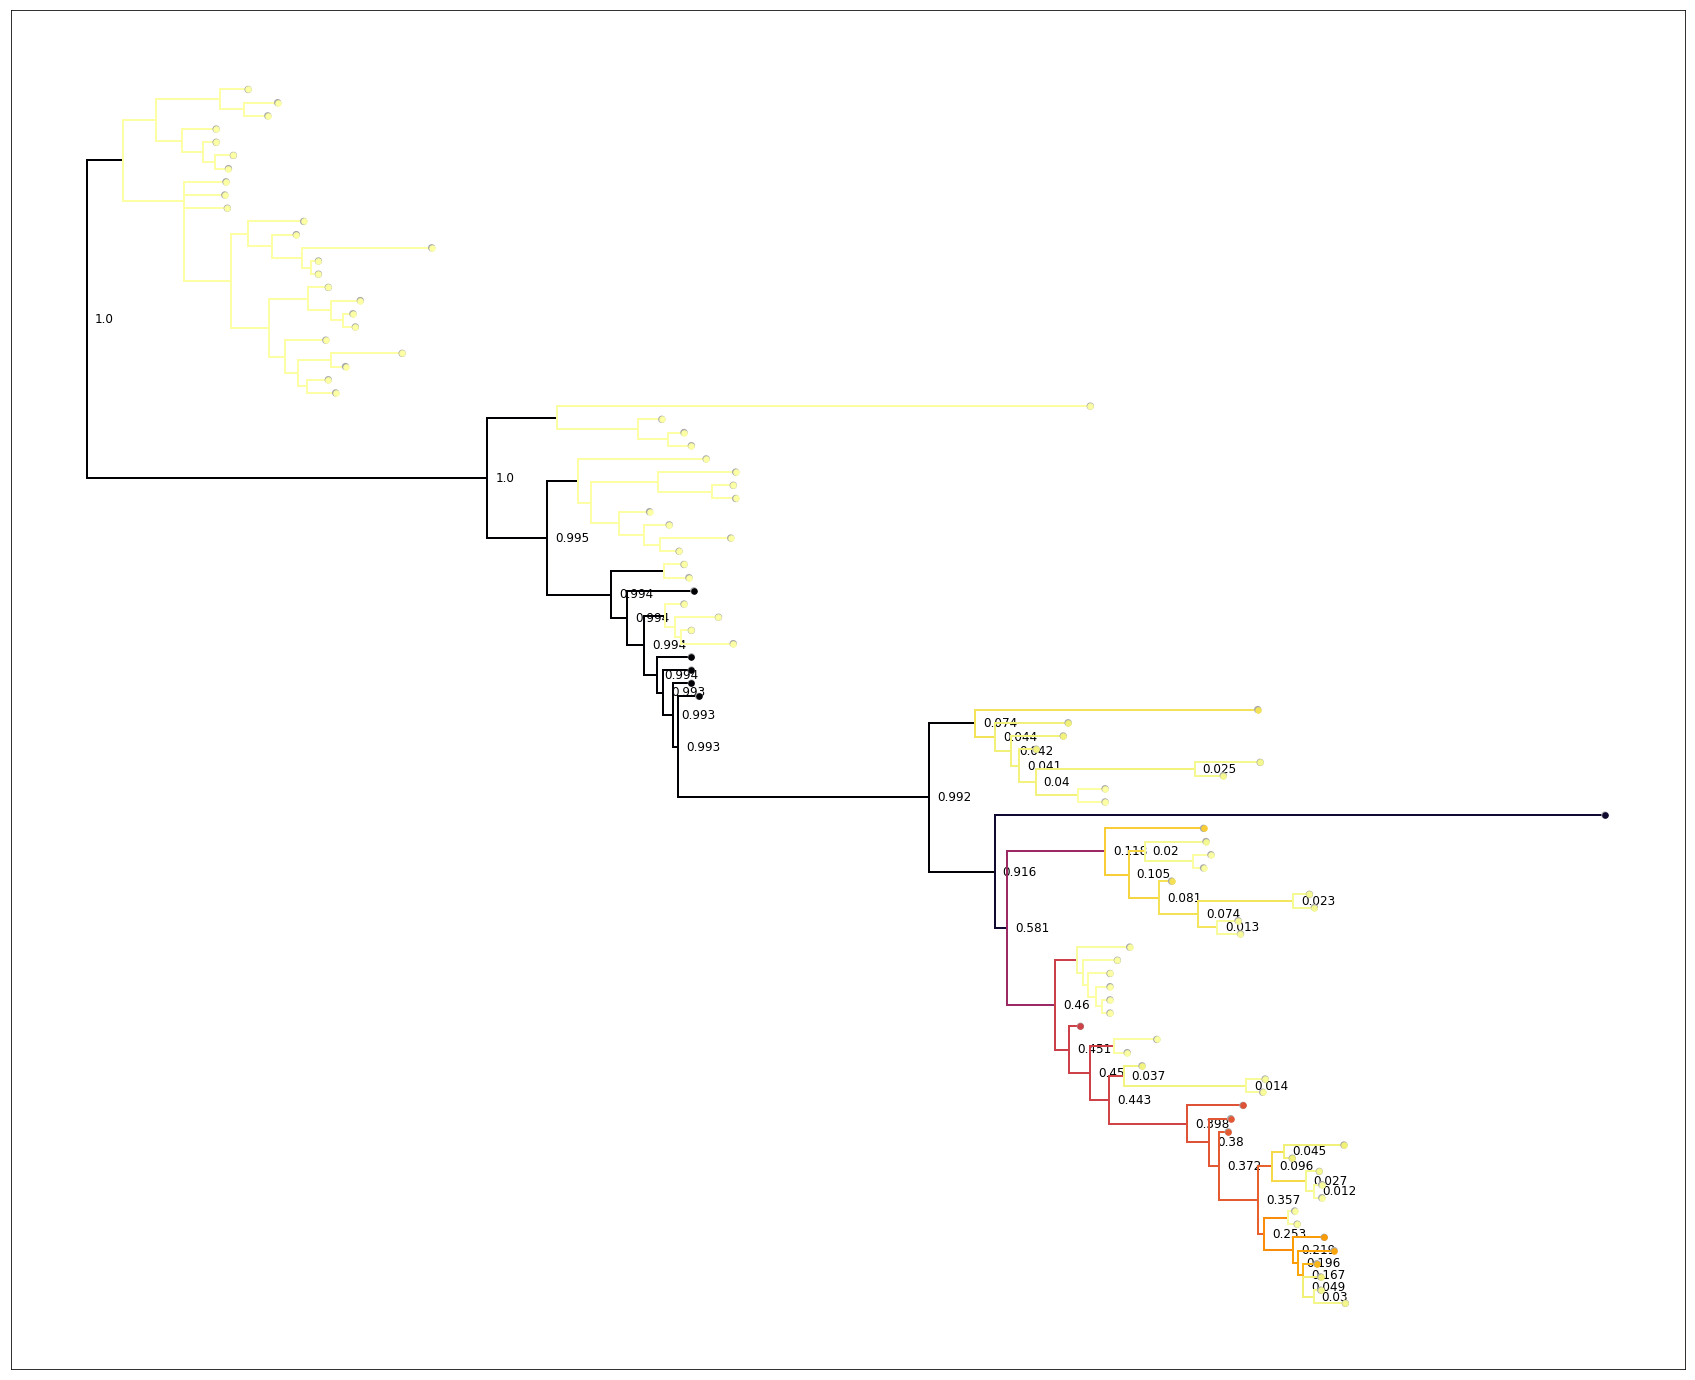

In [17]:
fig,ax = plt.subplots(figsize=(30,25),facecolor='w')

for k in conakry.nodes(): ## iterate over objects in tree
    
    # positioning
    y=con_y_positions.get(k) 
    if k.edge.rootedge:
        x=0.0
    else:
        x=k.distance_from_root()

    # dropped tips, color, lty, size
    txt = ""
    if con_node_probs.get(k) != None:
        c = cmap(1-(con_node_probs.get(k)))
        if con_node_probs.get(k) >= .01:
            txt = round(con_node_probs.get(k), 3)
    else:
        c = cmap(1-(con_node_probs.get(k.parent_node)))
        
    
    if k.is_leaf(): # if leaf...
        ax.scatter(x,y,s=s,facecolor=c,edgecolor=c,zorder=11) # plot circle for every tip
        ax.scatter(x,y,s=s+0.8*s,facecolor='darkgrey',edgecolor='none',zorder=10) # plot black circle underneath
        
    else:
        yc1 = con_y_positions.get(k.child_nodes()[0])
        yc2 = con_y_positions.get(k.child_nodes()[-1])
        xc1 = k.child_nodes()[0].distance_from_root()
        xc2 = k.child_nodes()[-1].distance_from_root()
    
        ax.plot([x,x],[yc1, yc2],lw=branchWidth, color=c,ls=lty,zorder=9) #vertical bar plotting
        ax.plot([xc1,x], [yc1,yc1], lw=branchWidth, color=c, ls=lty, zorder=9) #plot top child edge
        ax.plot([xc2,x], [yc2,yc2], lw=branchWidth, color=c, ls=lty, zorder=9) #plot bottom child edge
    
    #labeling
    ax.text(x + .009, y, txt, va = 'center', ha= 'left', size=12, color = 'k')

ax.set_ylim(-5, len(conakry.leaf_nodes()) + 5)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

### Z-Scores

In [18]:
con_zs = node_zscores(con_node_probs, conakry)

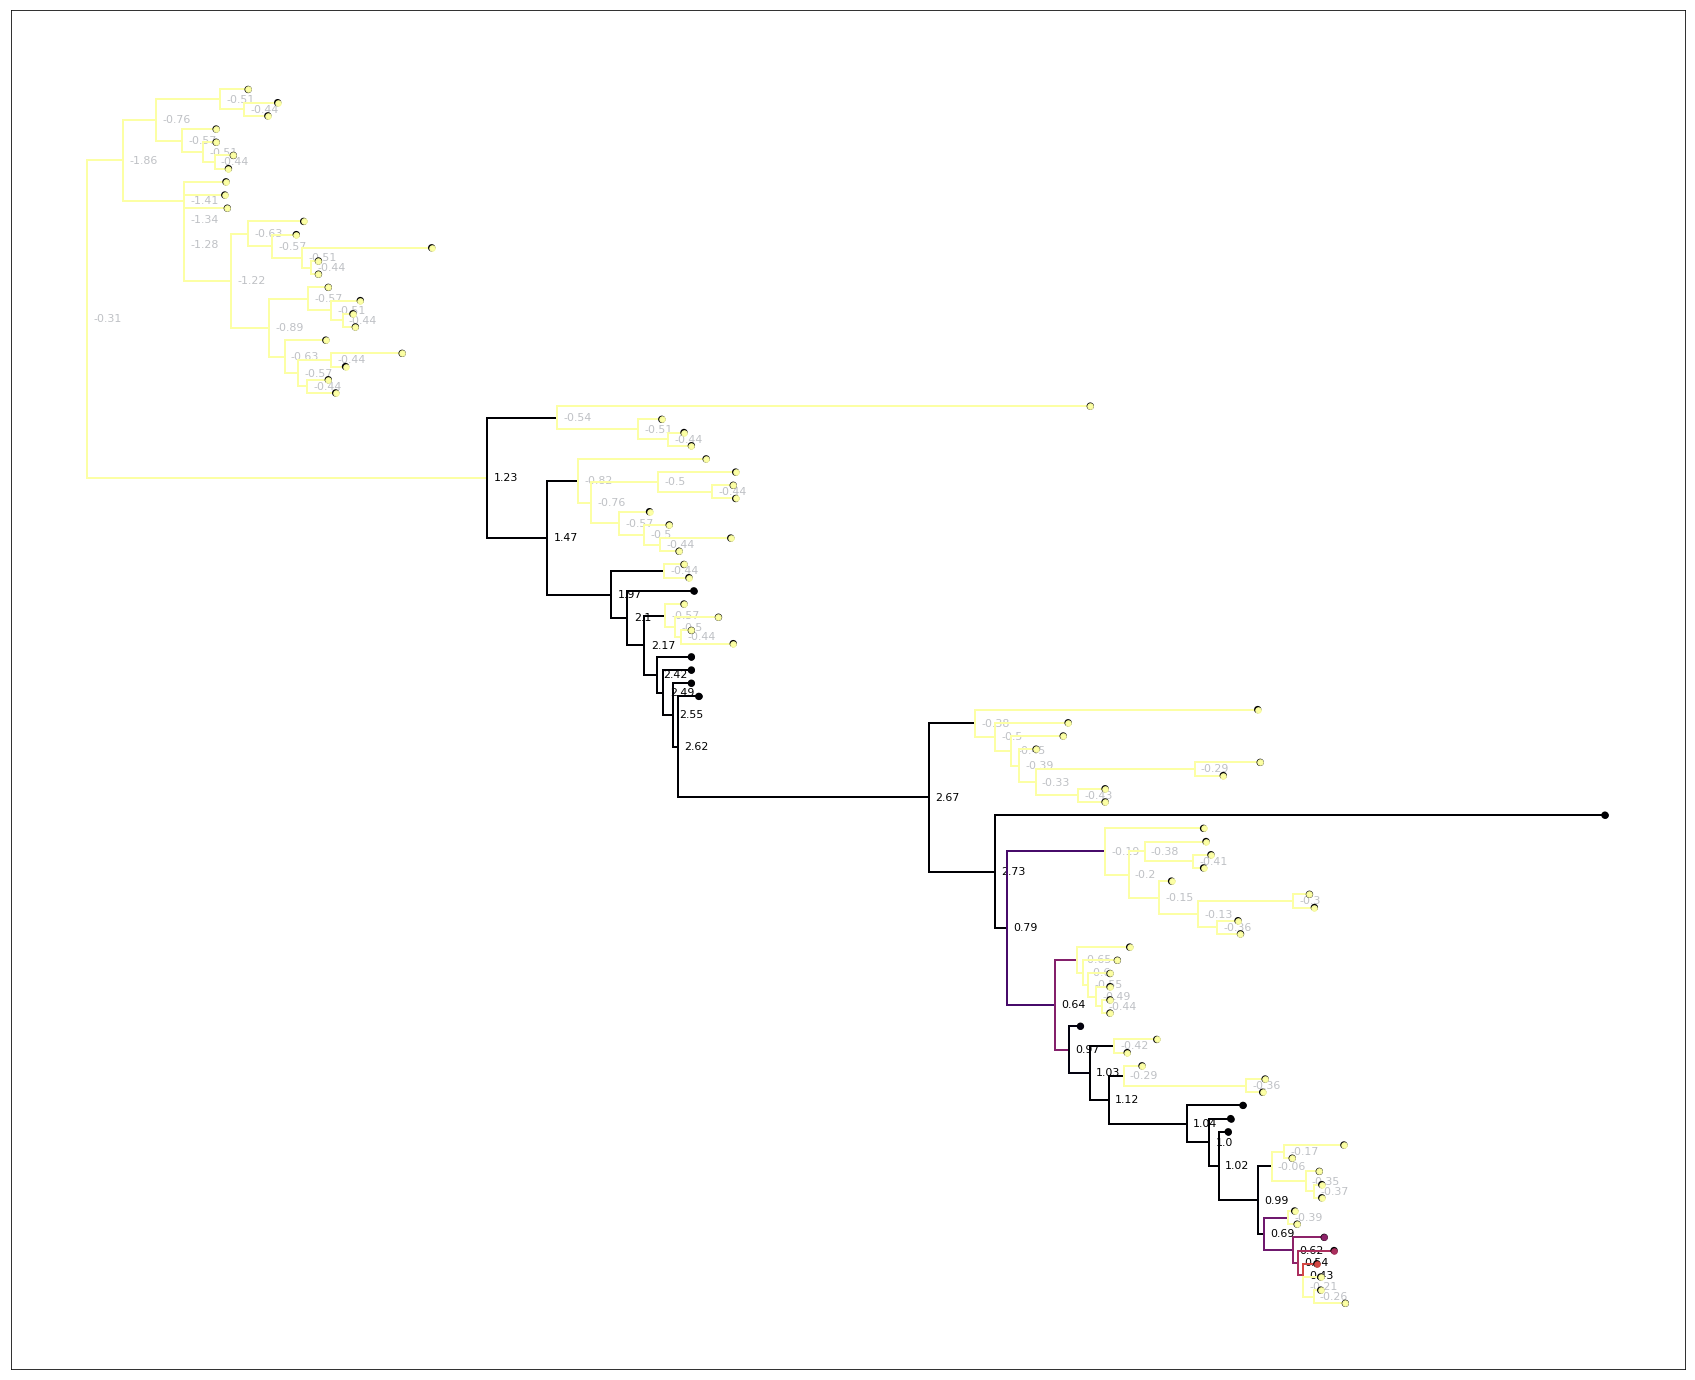

In [19]:
fig,ax = plt.subplots(figsize=(30,25),facecolor='w')

for k in conakry.nodes(): ## iterate over objects in tree
    
    # positioning
    y=con_y_positions.get(k) 
    if k.edge.rootedge:
        x=0.0
    else:
        x=k.distance_from_root()

    # dropped tips, color, lty, size
    if con_node_probs.get(k) != None:
        c = cmap(1-(con_zs.get(k)))
        txt = round(con_zs.get(k), 2)
        if con_zs.get(k) > 0:
            col = "k"
        else:
            col = '#bfc1c5'
    else:
        c = cmap(1-(con_zs.get(k.parent_node)))
        txt = ""
    
    if k.is_leaf(): # if leaf...
        ax.scatter(x,y,s=30,facecolor=c,edgecolor=c,zorder=11) # plot circle for every tip
        ax.scatter(x,y,s=30+0.8*30,facecolor='k',edgecolor='none',zorder=10) # plot black circle underneath
        
    else:
        yc1 = con_y_positions.get(k.child_nodes()[0])
        yc2 = con_y_positions.get(k.child_nodes()[-1])
        xc1 = k.child_nodes()[0].distance_from_root()
        xc2 = k.child_nodes()[-1].distance_from_root()
    
        ax.plot([x,x],[yc1, yc2],lw=branchWidth, color=c,ls=lty,zorder=9) #vertical bar plotting
        ax.plot([xc1,x], [yc1,yc1], lw=branchWidth, color=c, ls=lty, zorder=9) #plot top child edge
        ax.plot([xc2,x], [yc2,yc2], lw=branchWidth, color=c, ls=lty, zorder=9) #plot bottom child edge
    
    #labeling
    ax.text(x + .007, y, txt, va = 'center', ha= 'left', size=11, color = col)

ax.set_ylim(-5, len(conakry.leaf_nodes()) + 5)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

## Full Ebola MCC Tree

### Cumulative Expected Clade Proportions

In [20]:
ebov_node_probs = calculate_cumulative_node_prob(ebov, 1)
ebov_y_positions = y_dist_dict(ebov)

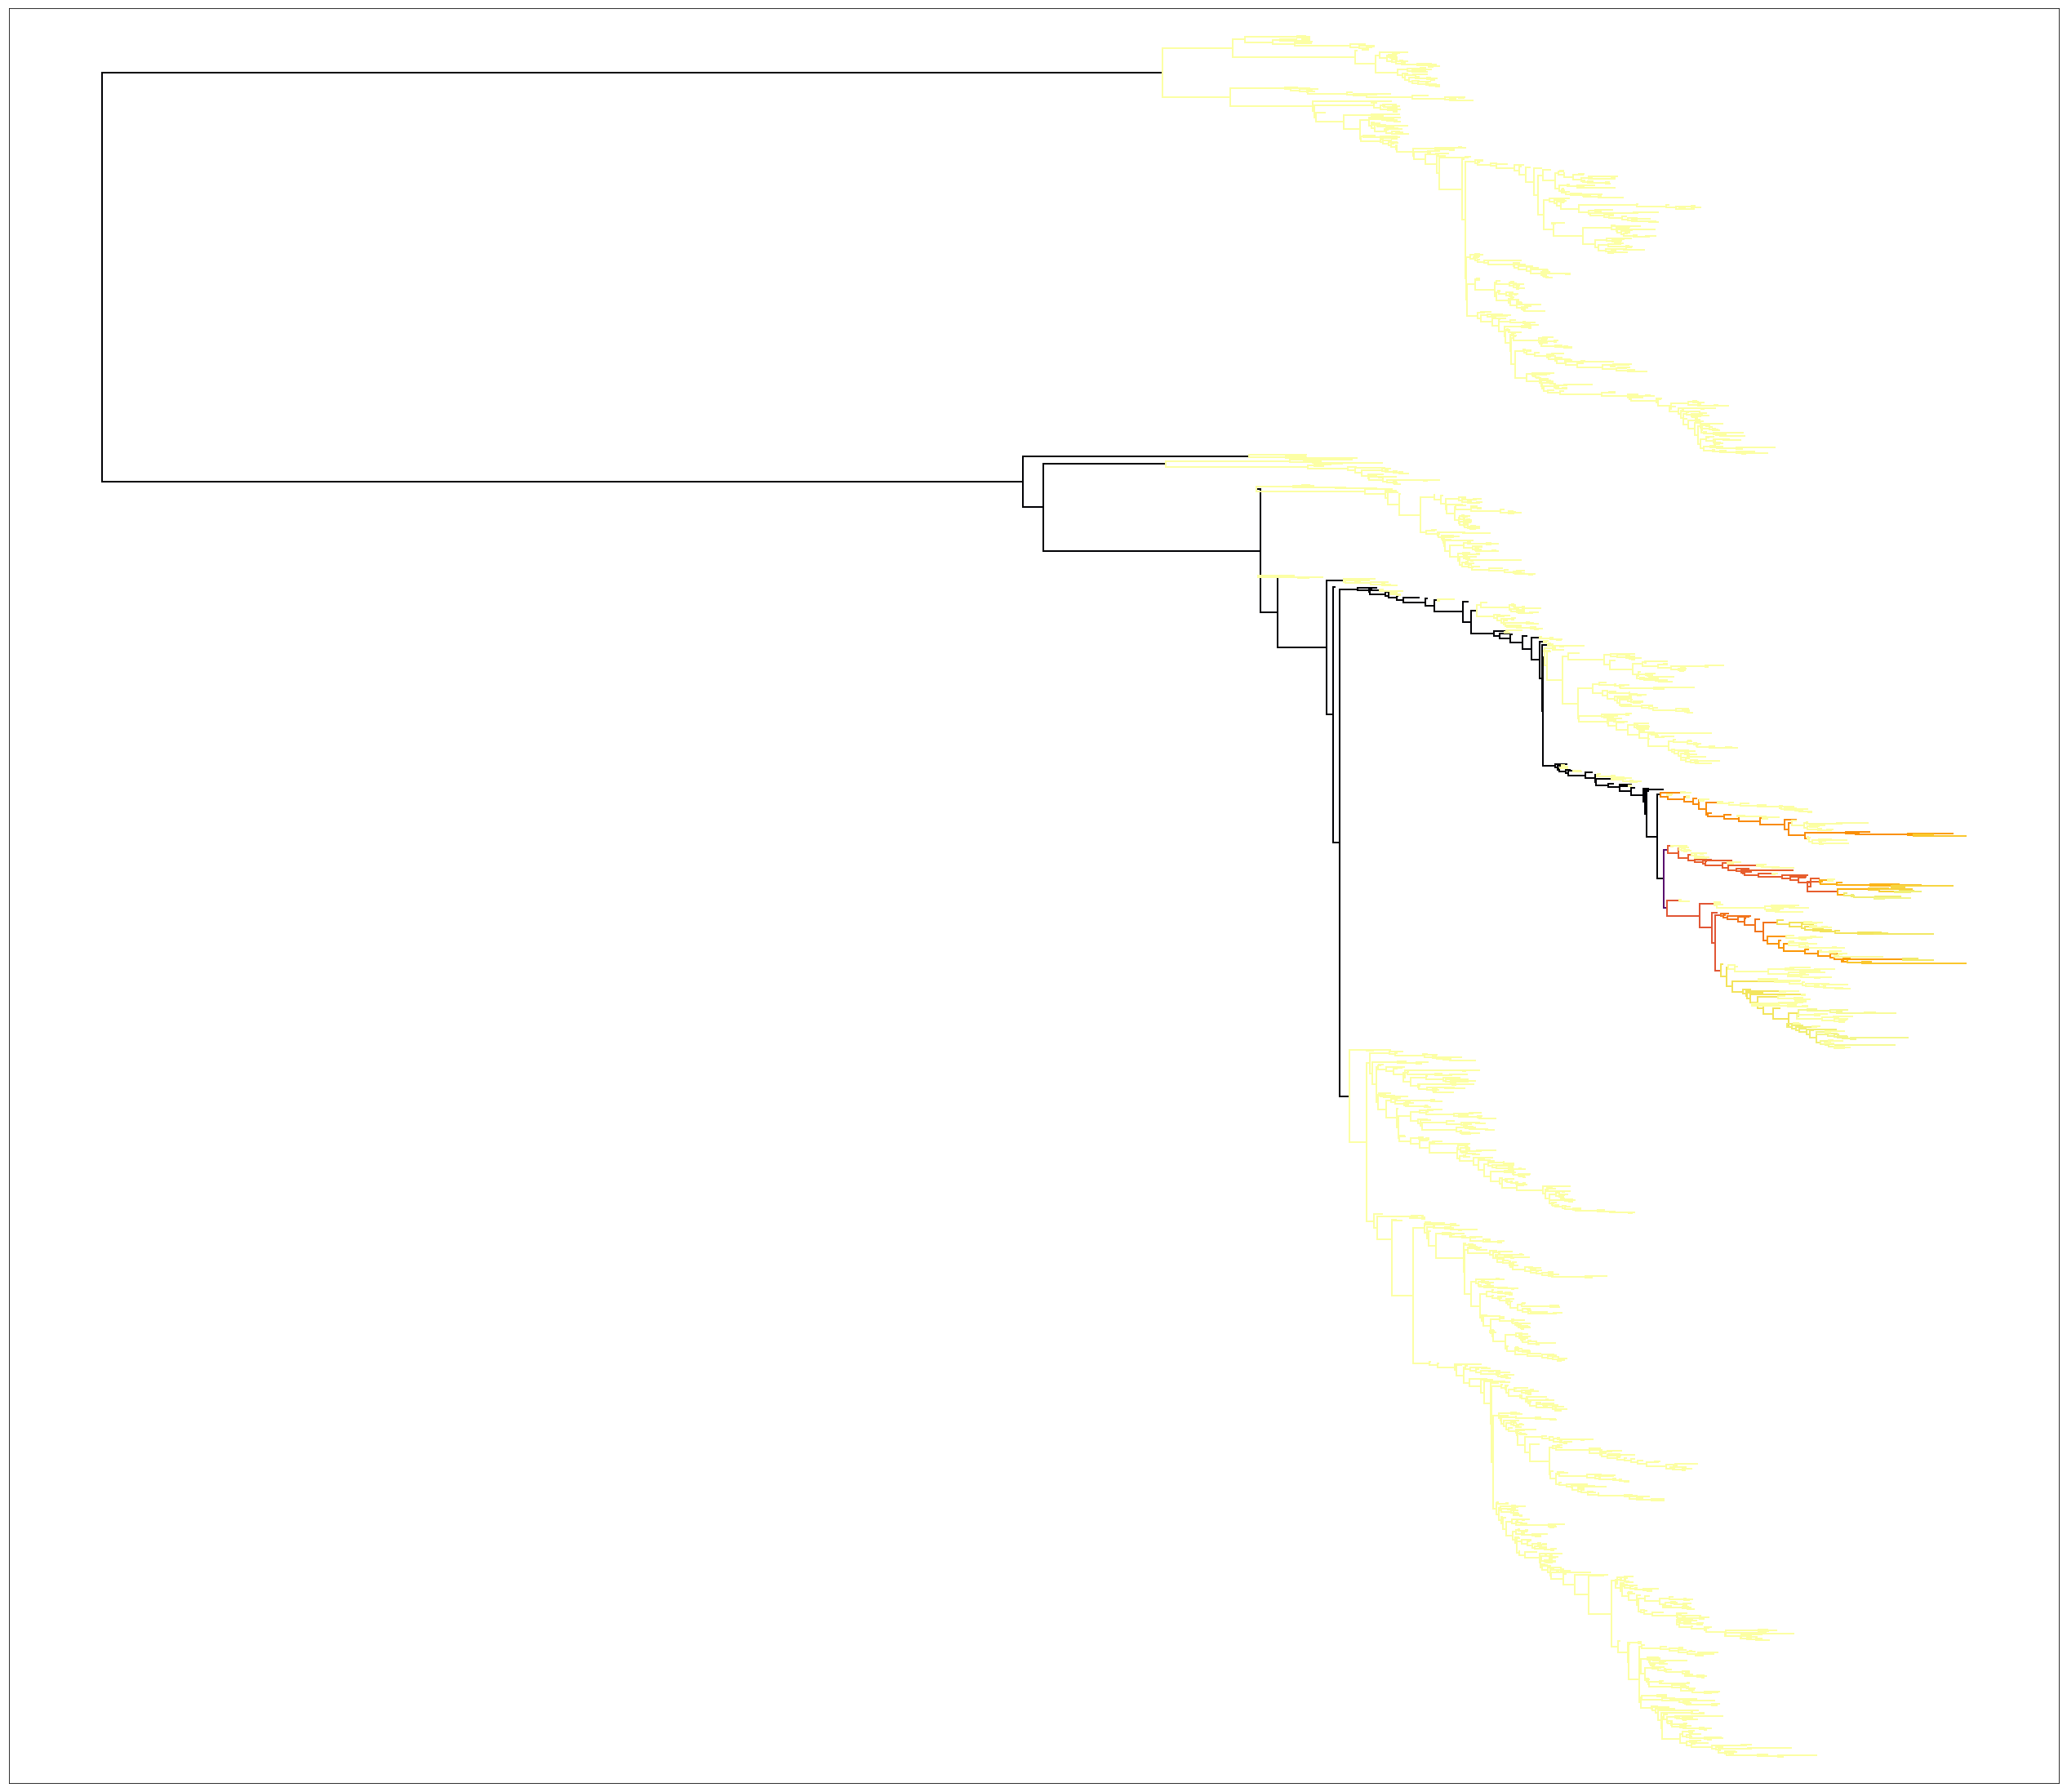

In [21]:
fig,ax = plt.subplots(figsize=(45,40),facecolor='w')

for k in ebov.nodes(): ## iterate over objects in tree
    
    # positioning
    y=ebov_y_positions.get(k) 
    if k.edge.rootedge:
        x=0.0
    else:
        x=k.distance_from_root()
        
    if ebov_node_probs.get(k) != None:
        c = cmap(1-(ebov_node_probs.get(k)))
    else:
        c = cmap(1-(ebov_node_probs.get(k.parent_node)))
        
    if not k.is_leaf():
        yc1 = ebov_y_positions.get(k.child_nodes()[0])
        yc2 = ebov_y_positions.get(k.child_nodes()[-1])
        xc1 = k.child_nodes()[0].distance_from_root()
        xc2 = k.child_nodes()[-1].distance_from_root()
    
        ax.plot([x,x],[yc1, yc2],lw=branchWidth, color=c,ls=lty,zorder=9) #vertical bar plotting
        ax.plot([xc1,x], [yc1,yc1], lw=branchWidth, color=c, ls=lty, zorder=9) #plot top child edge
        ax.plot([xc2,x], [yc2,yc2], lw=branchWidth, color=c, ls=lty, zorder=9) #plot bottom child edge

ax.set_ylim(-25, len(ebov.leaf_nodes()) + 25)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

### Z-Scores

In [22]:
ebov_zs = node_zscores(ebov_node_probs, ebov)

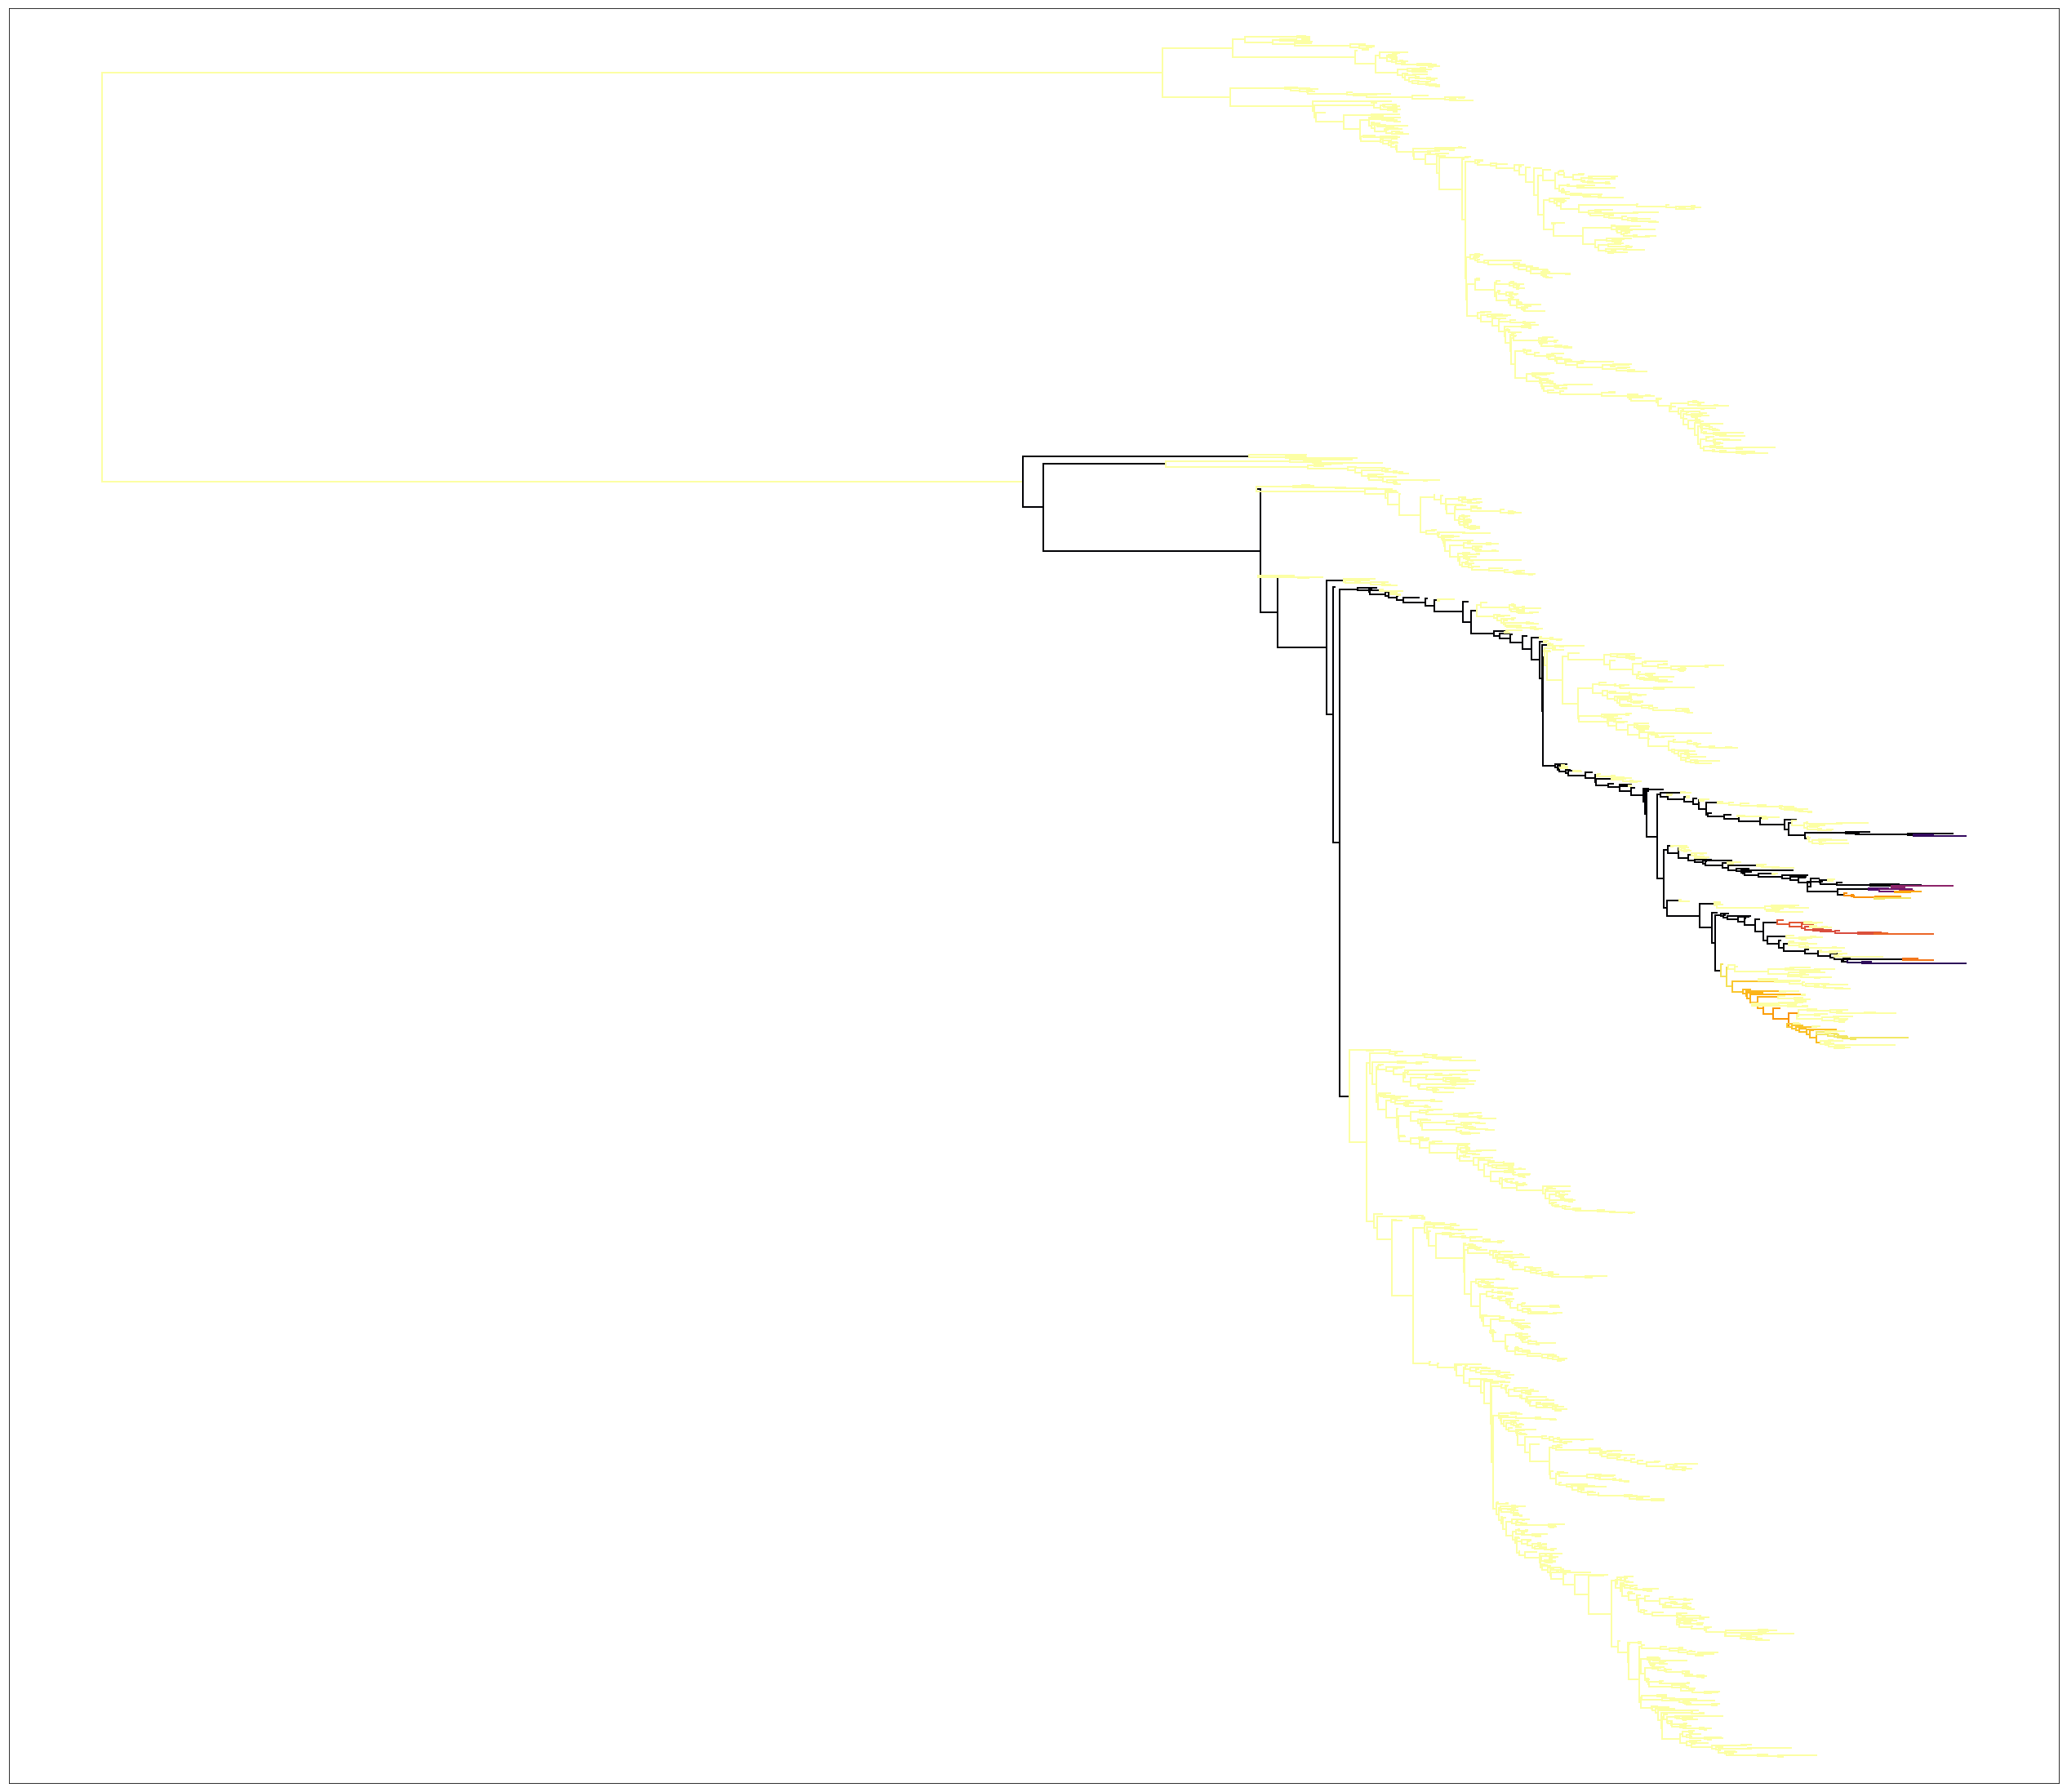

In [24]:
fig,ax = plt.subplots(figsize=(45,40),facecolor='w')

for k in ebov.nodes(): ## iterate over objects in tree
    
    # positioning
    y=ebov_y_positions.get(k) 
    if k.edge.rootedge:
        x=0.0
    else:
        x=k.distance_from_root()

    # dropped tips, color, lty, size
    if ebov_node_probs.get(k) != None:
        c = cmap(1-(ebov_zs.get(k)))
        if ebov_zs.get(k) > 0:
            col = "k"
        else:
            col = '#bfc1c5'
    else:
        c = cmap(1-(ebov_zs.get(k.parent_node)))
        
    if not k.is_leaf():
        yc1 = ebov_y_positions.get(k.child_nodes()[0])
        yc2 = ebov_y_positions.get(k.child_nodes()[-1])
        xc1 = k.child_nodes()[0].distance_from_root()
        xc2 = k.child_nodes()[-1].distance_from_root()
    
        ax.plot([x,x],[yc1, yc2],lw=branchWidth, color=c,ls=lty,zorder=9) #vertical bar plotting
        ax.plot([xc1,x], [yc1,yc1], lw=branchWidth, color=c, ls=lty, zorder=9) #plot top child edge
        ax.plot([xc2,x], [yc2,yc2], lw=branchWidth, color=c, ls=lty, zorder=9) #plot bottom child edge


ax.set_ylim(-25, len(ebov.leaf_nodes()) + 25)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()